<a href="https://colab.research.google.com/github/chanseongparkk/2022_Data_Analysis_Intern_practice/blob/main/07_12_02_%EC%9D%B4%EC%82%B0%ED%99%95%EB%A5%A0%EB%B6%84%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 이산확률분포 실습

In [ ]:
# 패키지 임포트
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# os에 따른 font 깨짐 제거를 위해 font 지정

import os

if os.name == "nt":
    font_family = "Malgun Gothic"
else: #mac os
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터값 설정

sns.set(font = font_family, rc = {"axes.unicode_minus" : False})

import warnings
warnings.filterwarnings("ignore")

### 1. 베르누이분포

* 확률론과 통계학에서 매 시행마다 오직 두가지의 가능한 결과만 일어난다고 할 때, 이러한 실험을 1회 시행하여 일어난 두가지 결과에 의해 그 값이 각각 0과 1로 결정나는 확률분포
* stats.bernoulli() : 베르누이 확률 변수 클래스

In [ ]:
# 베르누이 분포 정의

mu = 0.7
bern = stats.bernoulli(mu)

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


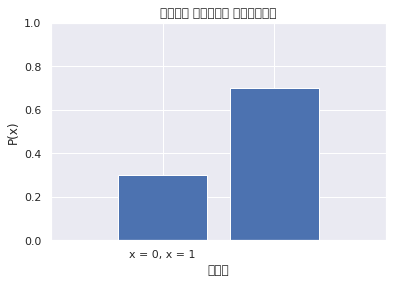

In [ ]:
## 확률질량함수 계산 및 시각화

b_x = [0,1]
bern_pmf = bern.pmf(b_x)

# 시각화

plt.bar(b_x, bern_pmf)
plt.xlim(-1,2)
plt.ylim(0,1)
plt.xticks([0,1],["x = 0, x = 1"])
plt.xlabel("표본값")
plt.ylabel("P(x)")
plt.title("베르누이 확률변수의 확률질량함수")
plt.show()

In [ ]:
# 베르누이 검정을 위한 베르누이 샘플 100개 생성

x_sample_bern = bern.rvs(100, random_state = 0)
x_sample_bern.shape

(100,)

In [ ]:
# 베르누이 시뮬레이션

y_bern = np.bincount(x_sample_bern, minlength = 2) / float(len(x_sample_bern))

df_bern = pd.DataFrame(
    {"결과" : bern_pmf,
     "검증(시뮬레이션)" : y_bern}
)
df_bern.index = [0,1]
df_bern

,결과,검증(시뮬레이션)
0,0.3,0.23
1,0.7,0.77


### 2. 이항분포

* **성공**에 해당하는 사상이 출현할 확률이 p인 똑같은 베르누이 시행을 독립적으로 n번 반복 시행행하여 일어난 두가지 결과에 의해 그 값이 각각 0,1로 결정되는 확률분포

* stats.binom.pmf(성공횟수, n = 실험횟수, p = 성공확률)

In [ ]:
### scipy 이항분포 확률질량함수 계산

# 0.3 확률을 갖는 15회의 실험에서 3회 성공할 확률 반환

print("k = 3, n = 15, p = 0.3의 PMF : ", stats.binom.pmf(k = 3, n = 15, p = 0.3))

# # 0.3 확률을 갖는 15회의 실험에서 0-4회 성공할 확률의 누적값 반환

print("k = 0-4, n = 15, p = 0.3의 PMF : ", stats.binom.cdf(k = 4, n = 15, p = 0.3))

k = 3, n = 15, p = 0.3의 PMF :  0.17004021326428578
k = 0-4, n = 15, p = 0.3의 PMF :  0.5154910592268429


In [ ]:
# p의 확률을 갖는 n회의 시행에서 k회 성공할 확률을 반환하는 함수 생성

def bion_dist(k, n, p):
  pmf_bion = stats.binom.pmf(k,n,p)
  return pmf_bion

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


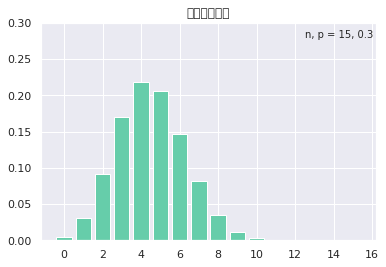

In [ ]:
# 0-15 범위 생성: 성공 횟수

x = np.arange(0,16)

# 확률질량함수의 값 array

pdf_result = [bion_dist(k,15,0.3) for k in range(0,16)]

# 시각화

plt.title("확률질량함수")
plt.ylim(0, 0.3)
plt.text(12.5, 0.28, "n, p = 15, 0.3")
plt.bar(x, pdf_result, color = "mediumaquamarine")
#plt.plot(x, pdf_result, color = "lightcoral")
plt.show()

### 3. 포아송분포

* 어떤 단위시간동안 발생한 사건 횟수를 x라고 했을때의 확률분포
* stats.poisson.pmf(n = 시행수, lamb = 평균발생수(기대값) )
* n회의 사건이 일어날 확률을 반환

In [ ]:
# scipy의 포아송 함수
# 3번의 시행에서 평균 사건수(2회)에 대한 발생 확률
stats.poisson.pmf(3, 2, loc = 0)

0.18044704431548356

In [ ]:
# n번의 시행에서 평균 사건 수에 대한 발생 확률 함수

def pois_dist(n, lamb):
  pmf_poi = stats.poisson.pmf(n, lamb, loc = 0)
  return pmf_poi

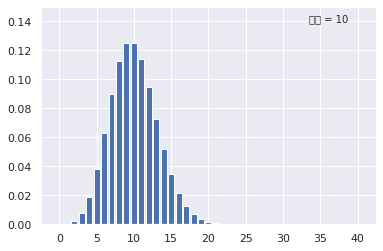

In [ ]:
# 확률질량함수의 값 array

x = np.arange(0,41)
poi_pdf_result = [pois_dist(n,10) for n in range(0,41)]

# 시각화

plt.ylim(0, 0.15)
plt.text(33.5, 0.14, "람다 = 10")
plt.bar(x, poi_pdf_result)
plt.show()

<BarContainer object of 41 artists>

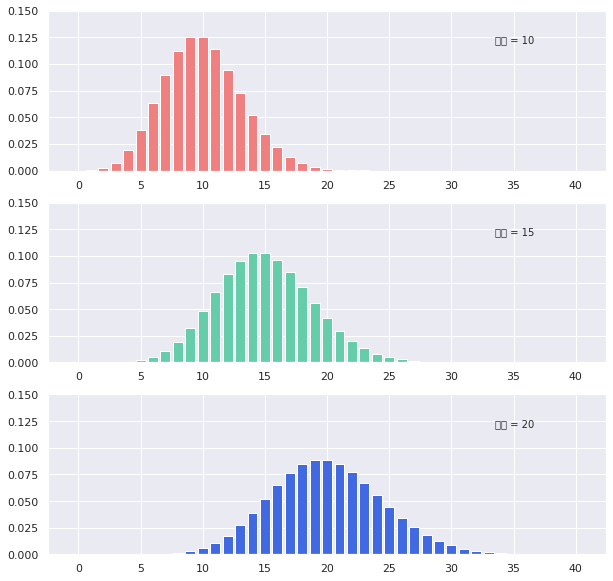

In [ ]:
## 기대값에 따른 포아송분포 차이 확인

x = np.arange(0,41)

fig = plt.figure(figsize = (10,10))

fig.add_subplot(3,1,1)
pmf_poin1 = np.array([pois_dist(n,10) for n in range(0,41)])
plt.ylim(0,0.15)
plt.text(33.5, 0.12, "람다 = 10")
plt.bar(x, pmf_poin1, color= "lightcoral")

fig.add_subplot(3,1,2)
pmf_poin1 = np.array([pois_dist(n,15) for n in range(0,41)])
plt.ylim(0,0.15)
plt.text(33.5, 0.12, "람다 = 15")
plt.bar(x, pmf_poin1, color= "mediumaquamarine")

fig.add_subplot(3,1,3)
pmf_poin1 = np.array([pois_dist(n,20) for n in range(0,41)])
plt.ylim(0,0.15)
plt.text(33.5, 0.12, "람다 = 20")
plt.bar(x, pmf_poin1, color= "royalblue")